In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.metrics import mean_squared_error

In [103]:
# Load the dataset
data_path = 'Data File.csv'
data = pd.read_csv('Data File.csv', low_memory=False)

# Display the first few rows of the dataset and the data types of the columns
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES
0,USC00047767,"SAN FRANCISCO OCEANSIDE, CA US",37.728,-122.5052,2.4,01/01/1950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00047767,"SAN FRANCISCO OCEANSIDE, CA US",37.728,-122.5052,2.4,01/02/1950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00047767,"SAN FRANCISCO OCEANSIDE, CA US",37.728,-122.5052,2.4,01/03/1950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00047767,"SAN FRANCISCO OCEANSIDE, CA US",37.728,-122.5052,2.4,01/04/1950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00047767,"SAN FRANCISCO OCEANSIDE, CA US",37.728,-122.5052,2.4,01/05/1950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


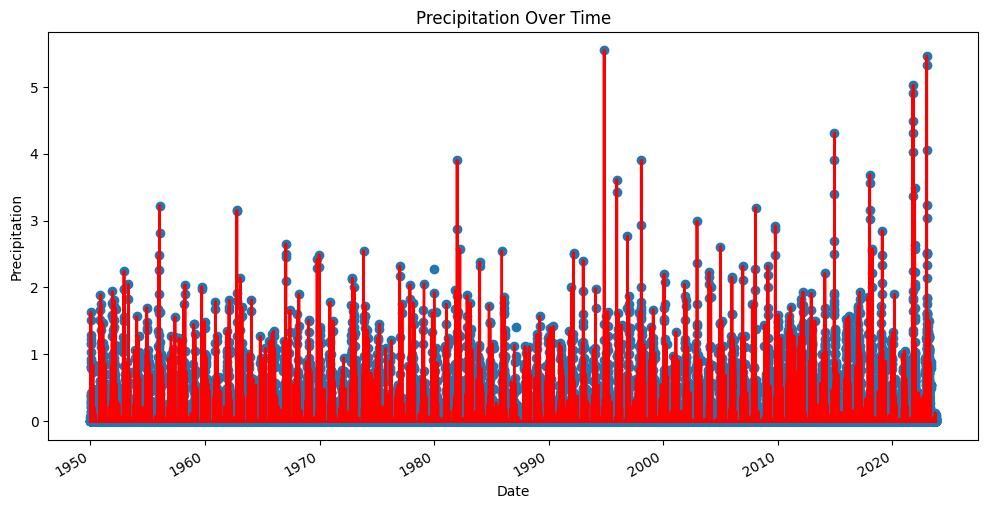

In [104]:
# Convert the 'date' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Sort the DataFrame based on the 'date' column (if needed)
data.sort_values(by='DATE', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Plotting the data
plt.plot(data['DATE'], data['PRCP'], marker='o', linestyle='-')
plt.plot(data['DATE'], data['PRCP'], color='red', linestyle='-', linewidth=2, markersize=4)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Time')

# Beautifying the x-axis date labels
plt.gcf().autofmt_xdate()  # Rotate and align the x labels nicely

# Display the plot
plt.show()

            DATE  PRCP
59220 1952-12-01  1.98
59226 1952-12-07  2.24
25516 1952-12-19  1.98
59367 1953-04-27  2.05
26614 1955-12-22  2.26
...          ...   ...
57271 2022-12-31  5.33
61917 2023-01-01  3.04
52265 2023-01-01  4.06
61159 2023-01-01  3.23
58700 2023-01-01  2.14

[115 rows x 2 columns]


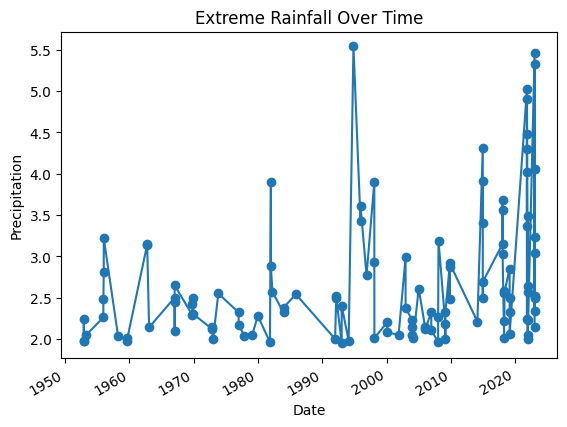

In [149]:
#Plotting the extreme events
no_zero = data[data['PRCP'] > 0]
extreme_event = no_zero[no_zero['PRCP'] > no_zero['PRCP'].quantile(0.99)]
extreme_events = extreme_event[['DATE', 'PRCP']].copy()
print(extreme_events)
plt.plot(extreme_events['DATE'], extreme_events['PRCP'], marker='o')
#plt.plot(no_zero['DATE'], no_zero['PRCP'], color='red', linestyle='-', linewidth=2, markersize=4)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Extreme Rainfall Over Time')

# Beautifying the x-axis date labels
plt.gcf().autofmt_xdate()  # Rotate and align the x labels nicely

# Display the plot
plt.show()

<AxesSubplot: xlabel='PRCP', ylabel='Count'>

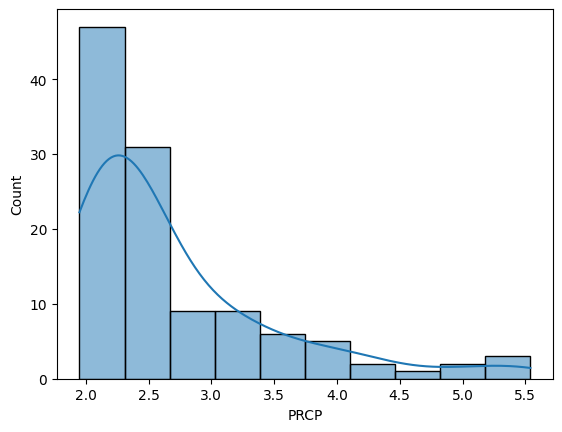

In [147]:
sns.histplot(extreme_events['PRCP'], bins=10, kde=True)

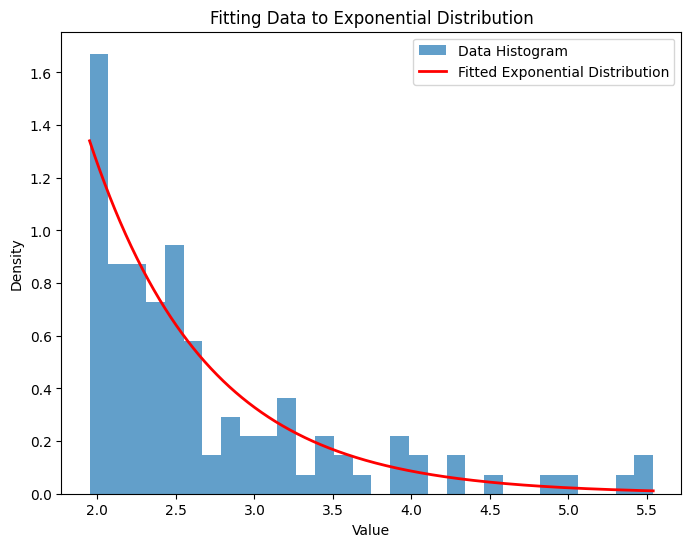

Mean: 2.696
Variance: 0.6503231304347826
Skewness: 1.712311675546909
Kurtosis: 2.590837716267516
Mean Squared Error (MSE): 5.377331540784792
Root Mean Squared Error (RMSE): 2.3189074023739695
KS Statistic: 0.08194437533402144
p-value: 0.40116827631688623
Akaike Information Criterion (AIC): 166.60317388097346
Bayesian Information Criterion (BIC): 172.09303813769995
The data follows the Exponential Distribution (fail to reject H0)


In [106]:
import scipy.stats as stats

#extreme_event = np.array(extreme_event, dtype=np.float64)
ext_prcp = extreme_events['PRCP']
# Fit the data to an Exponential Distribution
loc, scale = stats.expon.fit(ext_prcp)

# Generate values for the Exponential Distribution using the fitted parameters
xmin, xmax = np.min(ext_prcp), np.max(ext_prcp)
x = np.linspace(xmin, xmax, 1000)
fitted_distribution = stats.expon.pdf(x, loc=loc, scale=scale)

# Plotting the histogram of the data
plt.figure(figsize=(8, 6))
plt.hist(ext_prcp, bins=30, density=True, alpha=0.7, label='Data Histogram')

# Plotting the fitted Exponential Distribution
plt.plot(x, fitted_distribution, 'r-', linewidth=2, label='Fitted Exponential Distribution')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()

# Show plot
plt.show()


fitted_distribution = stats.expon(loc=loc, scale=scale)
predicted_values = fitted_distribution.pdf(ext_prcp)


mean_value = np.mean(ext_prcp)
variance = np.var(ext_prcp)
skewness = stats.skew(ext_prcp)
kurtosis_value = stats.kurtosis(ext_prcp)

print(f"Mean: {mean_value}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_value}")


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ext_prcp, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

ks_statistic, ks_p_value = stats.kstest(ext_prcp, fitted_distribution.cdf)

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

log_likelihood = np.sum(fitted_distribution.logpdf(ext_prcp))

# Number of parameters in the model
num_params = 2  # Exponential distribution: loc and scale

# Calculate AIC and BIC
n = len(ext_prcp)
aic = -2 * log_likelihood + 2 * num_params
bic = -2 * log_likelihood + num_params * np.log(n)

print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

alpha = 0.05  # Significance level
if ks_p_value < alpha:
    print("The data does not follow the Exponential Distribution (reject H0)")
else:
    print("The data follows the Exponential Distribution (fail to reject H0)")
    

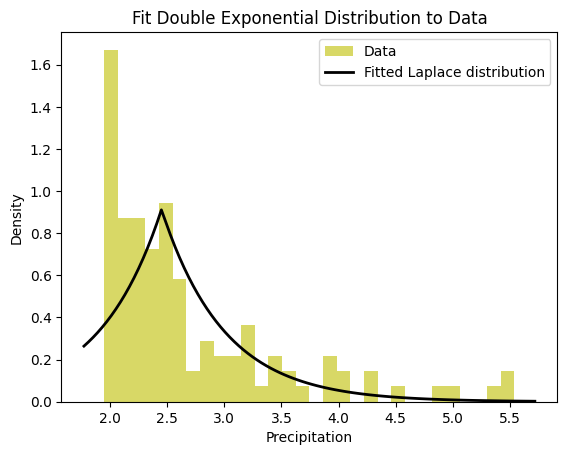

Fitted Laplace distribution parameters (loc, scale): 2.45, 0.5475652173913044
KS Statistic: 0.9288629642067432
p-value: 1.9600700260949644e-132
Akaike Information Criterion (AIC): 783.5038515287874
Bayesian Information Criterion (BIC): 788.9937157855139
The data does not follow the Exponential Distribution (reject H0)


In [125]:
from scipy.stats import laplace
from scipy.optimize import curve_fit

loc, scale = laplace.fit(ext_prcp)

# 4. Plot histogram of data with fitted Laplace distribution
plt.hist(ext_prcp, bins=30, density=True, alpha=0.6, color='y', label='Data')  # Plot histogram

# Generate points for the PDF using the fitted Laplace parameters
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = laplace.pdf(x, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Laplace distribution')  # Plot PDF

plt.title('Fit Double Exponential Distribution to Data')
plt.xlabel('Precipitation')
plt.ylabel('Density')
plt.legend()

plt.show()

print(f"Fitted Laplace distribution parameters (loc, scale): {loc}, {scale}")

predicted_values = laplace.pdf(ext_prcp)


ks_statistic, ks_p_value = stats.kstest(ext_prcp, laplace.cdf)

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

log_likelihood = np.sum(laplace.logpdf(ext_prcp))

# Number of parameters in the model
num_params = 2  # Exponential distribution: loc and scale

# Calculate AIC and BIC
n = len(ext_prcp)
aic = -2 * log_likelihood + 2 * num_params
bic = -2 * log_likelihood + num_params * np.log(n)

print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

alpha = 0.05  # Significance level
if ks_p_value < alpha:
    print("The data does not follow the Exponential Distribution (reject H0)")
else:
    print("The data follows the Exponential Distribution (fail to reject H0)")
    

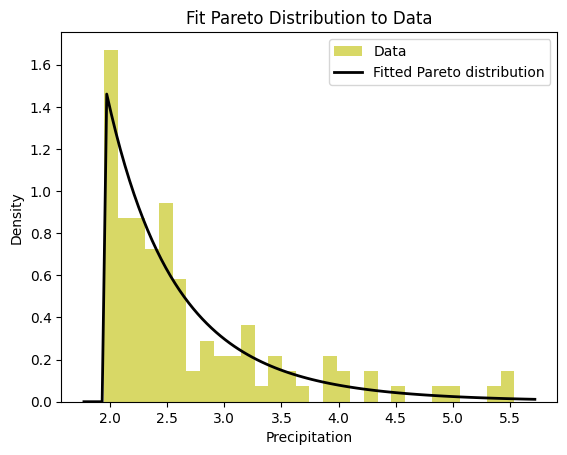

Fitted Pareto distribution parameters (shape, loc, scale): 8.695910557947125, -3.8065794911654773, 5.756579491165477
Kolmogorov-Smirnov test statistic: 0.0574782499294304
Kolmogorov-Smirnov test p-value: 0.8206482708973278
AIC: inf
BIC: inf
Fitted Pareto distribution parameters (shape, loc, scale): 1.0, 1.95, 5.54


In [128]:
from scipy.stats import pareto
from scipy.optimize import curve_fit
from scipy.stats import kstest
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import math

# Assuming you have loaded your precipitation data into ext_prcp
# Example:
# ext_prcp = np.array([1.2, 1.5, 2.3, 0.8, 1.9, ...])

# 3. Fit data to Pareto distribution
shape, loc, scale = pareto.fit(ext_prcp)

# 4. Plot histogram of data with fitted Pareto distribution
plt.hist(ext_prcp, bins=30, density=True, alpha=0.6, color='y', label='Data')  # Plot histogram

# Generate points for the PDF using the fitted Pareto parameters
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = pareto.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Pareto distribution')  # Plot PDF

plt.title('Fit Pareto Distribution to Data')
plt.xlabel('Precipitation')
plt.ylabel('Density')
plt.legend()

plt.show()

print(f"Fitted Pareto distribution parameters (shape, loc, scale): {shape}, {loc}, {scale}")

# 5. Calculate goodness-of-fit metrics (e.g., Kolmogorov-Smirnov test)
ks_statistic, ks_p_value = kstest(ext_prcp, 'pareto', args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
print(f"Kolmogorov-Smirnov test p-value: {ks_p_value}")

def neg_log_likelihood(params, data):
    shape, loc, scale = params
    return -np.sum(pareto.logpdf(data, shape, loc=loc, scale=scale))

# Fit Pareto distribution to the data
initial_guess = (1, np.min(ext_prcp), np.max(ext_prcp))  # Initial guess for parameters (shape, loc, scale)
result = minimize(neg_log_likelihood, initial_guess, args=(ext_prcp,))
shape, loc, scale = result.x

# Calculate number of parameters in the model
k = 3  # Number of parameters (shape, loc, scale)

# Calculate negative log-likelihood and number of observations
n = len(ext_prcp)
neg_log_likelihood_value = -result.fun
bic = -2 * neg_log_likelihood_value + k * np.log(n)
aic = -2 * neg_log_likelihood_value + 2 * k

print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"Fitted Pareto distribution parameters (shape, loc, scale): {shape}, {loc}, {scale}")

Lognormal Model Parameters: (1.1361940183373824, 1.922997805261129, 0.44444266572992264)


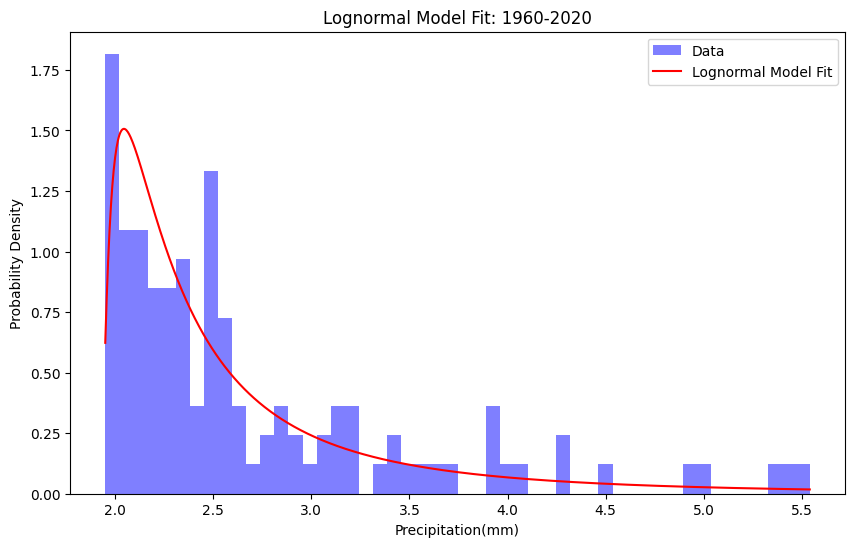

Akaike Information Criterion (AIC): 175.21
Bayesian Information Criterion (BIC): 183.44
KS Statistic: 0.07
p-value: 0.5234


In [133]:
# Fitting the data to a lognormal distribution
params_lognorm = lognorm.fit(ext_prcp)
print('Lognormal Model Parameters:', params_lognorm)
pdf_lognorm = lognorm.pdf(np.linspace(ext_prcp.min(), ext_prcp.max(), 1000), *params_lognorm)

# Calculate AIC and BIC
lognorm_aic = -2 * lognorm.logpdf(ext_prcp, *params_lognorm).sum() + 2 * len(params_lognorm)
n = len(ext_prcp)
lognorm_bic = -2 * lognorm.logpdf(ext_prcp, *params_lognorm).sum() + len(params_lognorm) * np.log(n)

ks_statistic, ks_p_value = kstest(ext_prcp, 'lognorm', args=params_lognorm)

# Plotting the lognormal model fit graph
plt.figure(figsize=(10, 6))

plt.hist(ext_prcp, bins=50, density=True, alpha=0.5, color='b', label='Data')
plt.plot(np.linspace(ext_prcp.min(), ext_prcp.max(), 1000), pdf_lognorm, color='red', label='Lognormal Model Fit')
plt.title('Lognormal Model Fit: 1960-2020')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"Akaike Information Criterion (AIC): {lognorm_aic:.2f}")
print(f"Bayesian Information Criterion (BIC): {lognorm_bic:.2f}")
print(f"KS Statistic: {ks_statistic:.2f}")
print(f"p-value: {ks_p_value:.4f}")

In [79]:
extreme_events['DATE'] = pd.to_datetime(extreme_events['DATE'], errors='coerce')

# Split data into two groups
data_1990_2020 = extreme_events[(extreme_events['DATE'].dt.year <= 2020) & (extreme_events['DATE'].dt.year > 1990)]
data_1960_1990 = extreme_events[(extreme_events['DATE'].dt.year <= 1990) & (extreme_events['DATE'].dt.year > 1960)]


In [39]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Density')

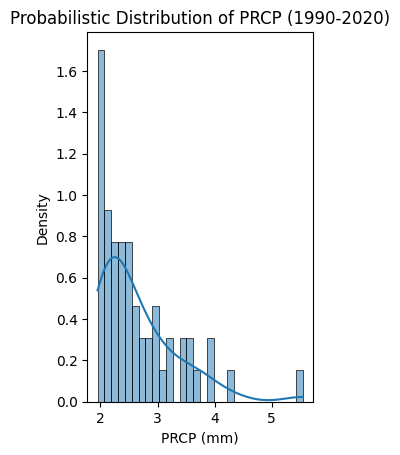

In [80]:
plt.subplot(1, 2, 1)
sns.histplot(data_1990_2020['PRCP'], kde=True, stat="density", bins=30)
plt.title('Probabilistic Distribution of PRCP (1990-2020)')
plt.xlabel('PRCP (mm)')
plt.ylabel('Density')


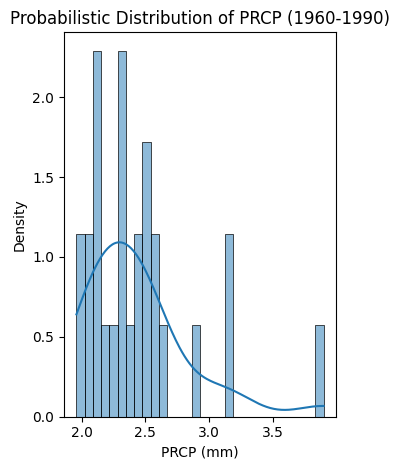

In [81]:
plt.subplot(1, 2, 2)
sns.histplot(data_1960_1990['PRCP'], kde=True, stat="density", bins=30)
plt.title('Probabilistic Distribution of PRCP (1960-1990)')
plt.xlabel('PRCP (mm)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

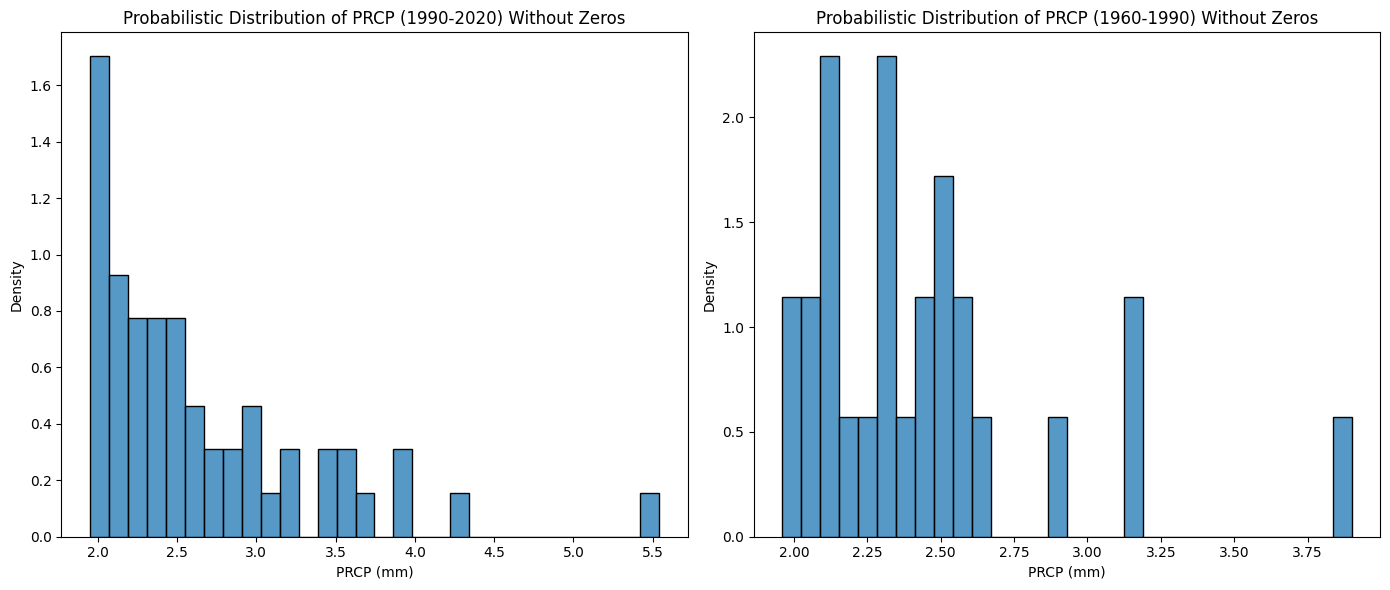

In [91]:
# Filter out entries where PRCP is 0
data_1990_2020_no_zeros = data_1990_2020[data_1990_2020['PRCP'] > 0]
data_1960_1990_no_zeros = data_1960_1990[data_1960_1990['PRCP'] > 0]

# Replotting the probabilistic distributions without zeros
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_1990_2020_no_zeros['PRCP'], stat="density", bins=30)
plt.title('Probabilistic Distribution of PRCP (1990-2020) Without Zeros')
plt.xlabel('PRCP (mm)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(data_1960_1990_no_zeros['PRCP'], stat="density", bins=30)
plt.title('Probabilistic Distribution of PRCP (1960-1990) Without Zeros')
plt.xlabel('PRCP (mm)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


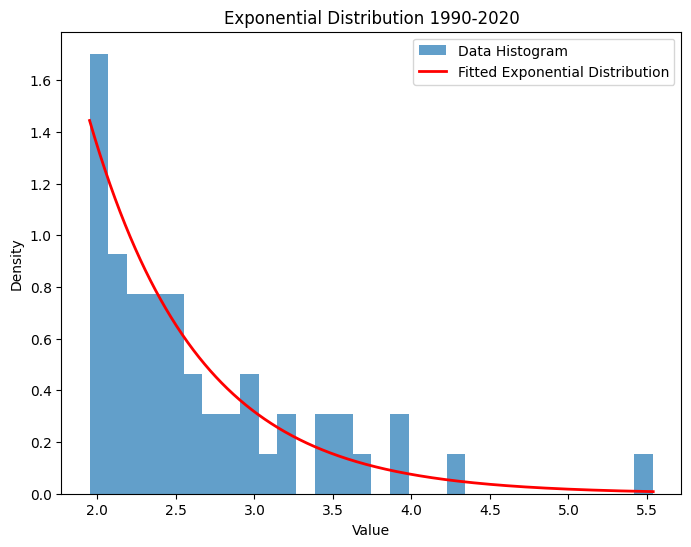

Mean: 2.642592592592593
Variance: 0.49934513031550076
Skewness: 1.7315555521383805
Kurtosis: 3.638868904082732
Mean Squared Error (MSE): 4.867281856813111
Root Mean Squared Error (RMSE): 2.206191708989296
KS Statistic: 0.06516354533362412
p-value: 0.9644752369344232
Akaike Information Criterion (AIC): 72.33015904847088
Bayesian Information Criterion (BIC): 76.30812714159943
The data follows the Exponential Distribution (fail to reject H0)


In [117]:
import scipy.stats as stats

prcp_90_20 = data_1990_2020_no_zeros['PRCP']
# Fit the data to an Exponential Distribution
loc, scale = stats.expon.fit(prcp_90_20)

# Generate values for the Exponential Distribution using the fitted parameters
xmin, xmax = np.min(prcp_90_20), np.max(prcp_90_20)
x = np.linspace(xmin, xmax, 1000)
fitted_distribution = stats.expon.pdf(x, loc=loc, scale=scale)

# Plotting the histogram of the data
plt.figure(figsize=(8, 6))
plt.hist(prcp_90_20, bins=30, density=True, alpha=0.7, label='Data Histogram')

# Plotting the fitted Exponential Distribution
plt.plot(x, fitted_distribution, 'r-', linewidth=2, label='Fitted Exponential Distribution')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution 1990-2020')
plt.legend()

# Show plot
plt.show()


fitted_distribution = stats.expon(loc=loc, scale=scale)
predicted_values = fitted_distribution.pdf(prcp_90_20)


mean_value = np.mean(prcp_90_20)
variance = np.var(prcp_90_20)
skewness = stats.skew(prcp_90_20)
kurtosis_value = stats.kurtosis(prcp_90_20)

print(f"Mean: {mean_value}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_value}")


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(prcp_90_20, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

ks_statistic, ks_p_value = stats.kstest(prcp_90_20, fitted_distribution.cdf)

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

log_likelihood = np.sum(fitted_distribution.logpdf(prcp_90_20))

# Number of parameters in the model
num_params = 2  # Exponential distribution: loc and scale

# Calculate AIC and BIC
n = len(prcp_90_20)
aic = -2 * log_likelihood + 2 * num_params
bic = -2 * log_likelihood + num_params * np.log(n)

print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

alpha = 0.05  # Significance level
if ks_p_value < alpha:
    print("The data does not follow the Exponential Distribution (reject H0)")
else:
    print("The data follows the Exponential Distribution (fail to reject H0)")
    

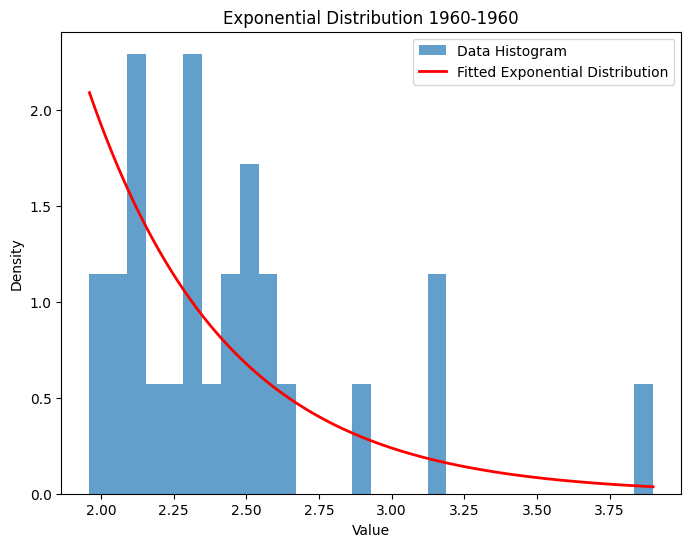

Mean: 2.438888888888889
Variance: 0.17466913580246915
Skewness: 1.7500386415079658
Kurtosis: 3.4095128883102923
Mean Squared Error (MSE): 2.9754190546958283
Root Mean Squared Error (RMSE): 1.724940304676028
KS Statistic: 0.15404308243584647
p-value: 0.4955001244907675
Akaike Information Criterion (AIC): 18.240519646089602
Bayesian Information Criterion (BIC): 20.83219337809826
The data follows the Exponential Distribution (fail to reject H0)


In [118]:
import scipy.stats as stats

prcp_60_90 = data_1960_1990_no_zeros['PRCP']
# Fit the data to an Exponential Distribution
loc, scale = stats.expon.fit(prcp_60_90)

# Generate values for the Exponential Distribution using the fitted parameters
xmin, xmax = np.min(prcp_60_90), np.max(prcp_60_90)
x = np.linspace(xmin, xmax, 1000)
fitted_distribution = stats.expon.pdf(x, loc=loc, scale=scale)

# Plotting the histogram of the data
plt.figure(figsize=(8, 6))
plt.hist(prcp_60_90, bins=30, density=True, alpha=0.7, label='Data Histogram')

# Plotting the fitted Exponential Distribution
plt.plot(x, fitted_distribution, 'r-', linewidth=2, label='Fitted Exponential Distribution')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution 1960-1990')
plt.legend()

# Show plot
plt.show()


fitted_distribution = stats.expon(loc=loc, scale=scale)
predicted_values = fitted_distribution.pdf(prcp_60_90)


mean_value = np.mean(prcp_60_90)
variance = np.var(prcp_60_90)
skewness = stats.skew(prcp_60_90)
kurtosis_value = stats.kurtosis(prcp_60_90)

print(f"Mean: {mean_value}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_value}")


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(prcp_60_90, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

ks_statistic, ks_p_value = stats.kstest(prcp_60_90, fitted_distribution.cdf)

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

log_likelihood = np.sum(fitted_distribution.logpdf(prcp_60_90))

# Number of parameters in the model
num_params = 2  # Exponential distribution: loc and scale

# Calculate AIC and BIC
n = len(prcp_60_90)
aic = -2 * log_likelihood + 2 * num_params
bic = -2 * log_likelihood + num_params * np.log(n)

print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

alpha = 0.05  # Significance level
if ks_p_value < alpha:
    print("The data does not follow the Exponential Distribution (reject H0)")
else:
    print("The data follows the Exponential Distribution (fail to reject H0)")
    

Lognormal Model Parameters: (1.07500807757112, 1.9117475054453559, 0.4464783078664184)


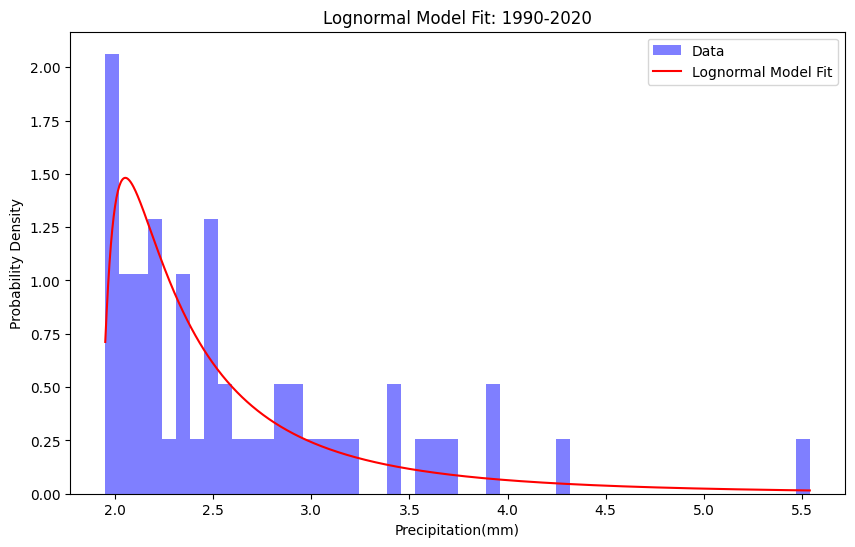

Akaike Information Criterion (AIC): 79.98
Bayesian Information Criterion (BIC): 85.94
KS Statistic: 0.09
p-value: 0.7551


In [130]:
# Fitting the data to a lognormal distribution
params_lognorm = lognorm.fit(prcp_90_20)
print('Lognormal Model Parameters:', params_lognorm)
pdf_lognorm = lognorm.pdf(np.linspace(prcp_90_20.min(), prcp_90_20.max(), 1000), *params_lognorm)

# Calculate AIC and BIC
lognorm_aic = -2 * lognorm.logpdf(prcp_90_20, *params_lognorm).sum() + 2 * len(params_lognorm)
n = len(prcp_90_20)
lognorm_bic = -2 * lognorm.logpdf(prcp_90_20, *params_lognorm).sum() + len(params_lognorm) * np.log(n)

ks_statistic, ks_p_value = kstest(prcp_90_20, 'lognorm', args=params_lognorm)

# Plotting the lognormal model fit graph
plt.figure(figsize=(10, 6))

plt.hist(prcp_90_20, bins=50, density=True, alpha=0.5, color='b', label='Data')
plt.plot(np.linspace(prcp_90_20.min(), prcp_90_20.max(), 1000), pdf_lognorm, color='red', label='Lognormal Model Fit')
plt.title('Lognormal Model Fit: 1990-2020')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"Akaike Information Criterion (AIC): {lognorm_aic:.2f}")
print(f"Bayesian Information Criterion (BIC): {lognorm_bic:.2f}")
print(f"KS Statistic: {ks_statistic:.2f}")
print(f"p-value: {ks_p_value:.4f}")

Lognormal Model Parameters: (0.6768593939102989, 1.8523143771714436, 0.4693175166077478)


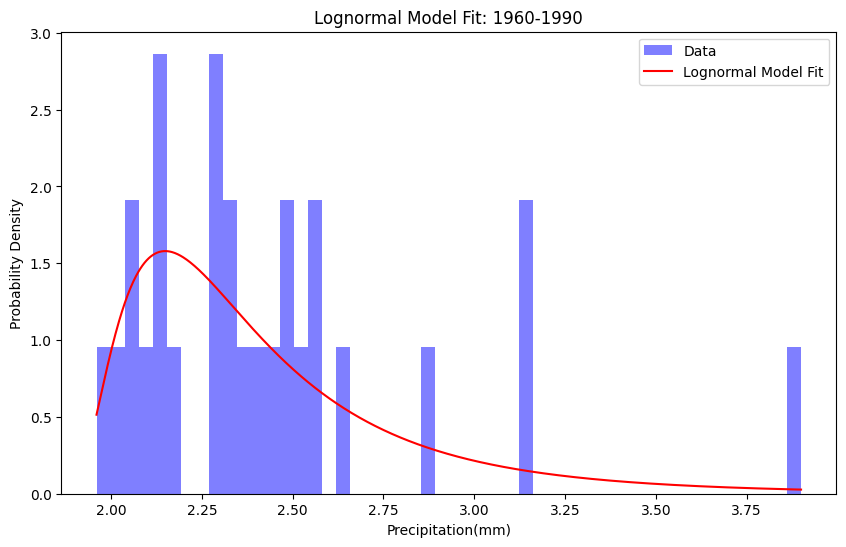

Akaike Information Criterion (AIC): 20.70
Bayesian Information Criterion (BIC): 24.59
KS Statistic: 0.11
p-value: 0.8497


In [132]:
# Fitting the data to a lognormal distribution
params_lognorm = lognorm.fit(prcp_60_90)
print('Lognormal Model Parameters:', params_lognorm)
pdf_lognorm = lognorm.pdf(np.linspace(prcp_60_90.min(), prcp_60_90.max(), 1000), *params_lognorm)

# Calculate AIC and BIC
lognorm_aic = -2 * lognorm.logpdf(prcp_60_90, *params_lognorm).sum() + 2 * len(params_lognorm)
n = len(prcp_60_90)
lognorm_bic = -2 * lognorm.logpdf(prcp_60_90, *params_lognorm).sum() + len(params_lognorm) * np.log(n)

ks_statistic, ks_p_value = kstest(prcp_60_90, 'lognorm', args=params_lognorm)

# Plotting the lognormal model fit graph
plt.figure(figsize=(10, 6))

plt.hist(prcp_60_90, bins=50, density=True, alpha=0.5, color='b', label='Data')
plt.plot(np.linspace(prcp_60_90.min(), prcp_60_90.max(), 1000), pdf_lognorm, color='red', label='Lognormal Model Fit')
plt.title('Lognormal Model Fit: 1960-1990')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"Akaike Information Criterion (AIC): {lognorm_aic:.2f}")
print(f"Bayesian Information Criterion (BIC): {lognorm_bic:.2f}")
print(f"KS Statistic: {ks_statistic:.2f}")
print(f"p-value: {ks_p_value:.4f}")

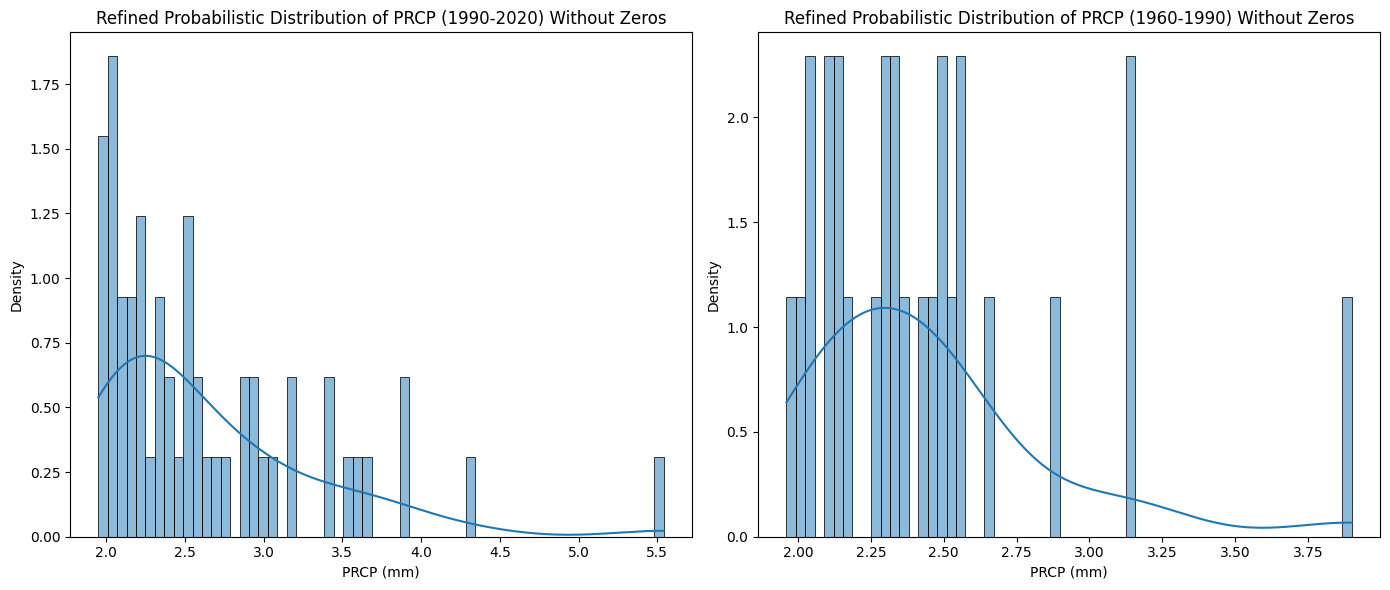

In [93]:
# Replotting the probabilistic distributions with a higher number of bins for more detail
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(prcp_90_20, kde=True, stat="density", bins=60)  # Increased bin count
plt.title('Refined Probabilistic Distribution of PRCP (1990-2020) Without Zeros')
plt.xlabel('PRCP (mm)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(data_1960_1990_no_zeros['PRCP'], kde=True, stat="density", bins=60)  # Increased bin count
plt.title('Refined Probabilistic Distribution of PRCP (1960-1990) Without Zeros')
plt.xlabel('PRCP (mm)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


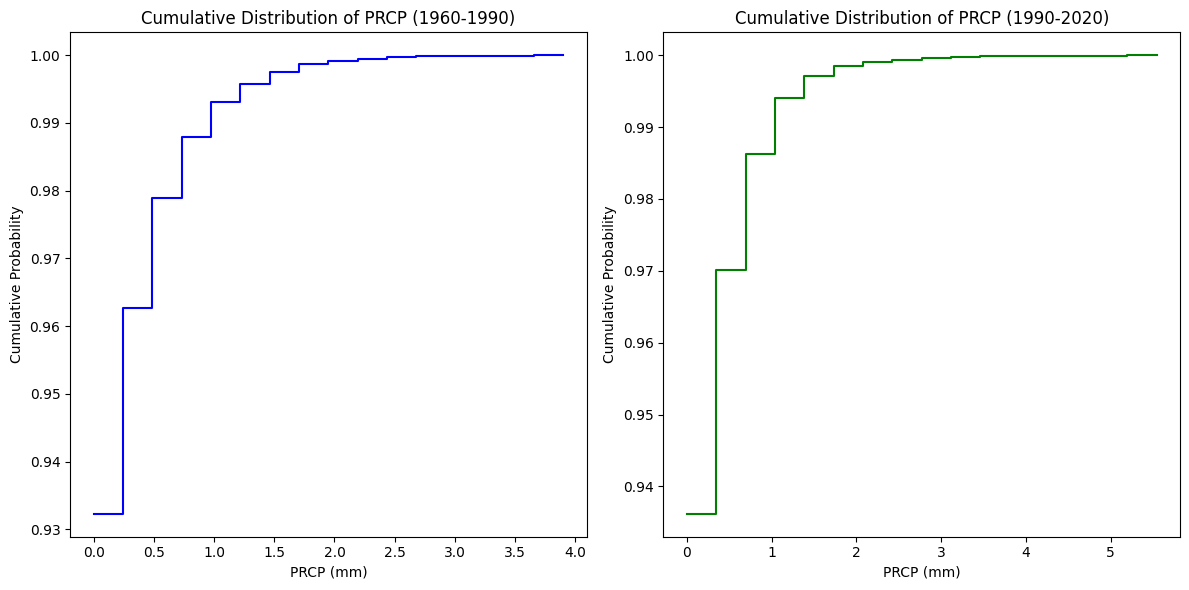

In [46]:
# Plotting the Cumulative Distribution Function (CDF) of PRCP
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_1960_1990['PRCP'], kde=False, stat="probability", element="step", cumulative=True, fill=False, color="blue")
plt.title('Cumulative Distribution of PRCP (1960-1990)')
plt.xlabel('PRCP (mm)')
plt.ylabel('Cumulative Probability')

plt.subplot(1, 2, 2)
sns.histplot(data_1990_2020['PRCP'], kde=False, stat="probability", element="step", cumulative=True, fill=False, color="green")
plt.title('Cumulative Distribution of PRCP (1990-2020)')
plt.xlabel('PRCP (mm)')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


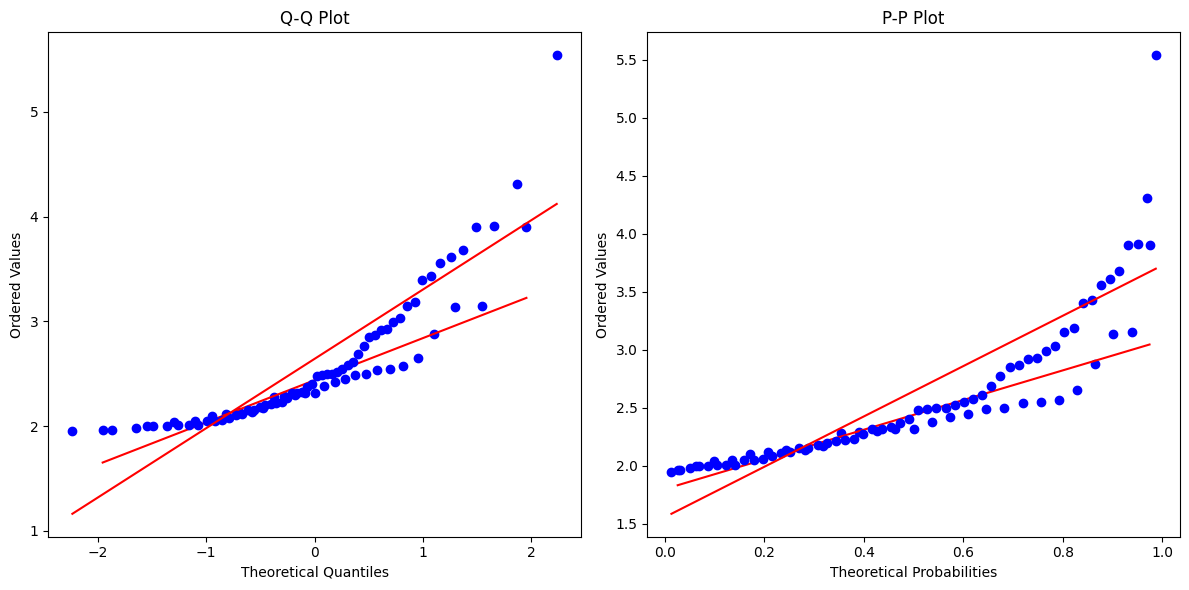

In [141]:
import scipy.stats as stats

# Clean data by dropping NA values for precise plotting
prcp_1960_1990_clean = prcp_60_90.dropna()
prcp_1990_2020_clean = prcp_90_20.dropna()

# Generating Q-Q plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(prcp_1960_1990_clean, dist="norm", plot=plt)
stats.probplot(prcp_1990_2020_clean, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Generating P-P plot
plt.subplot(1, 2, 2)
stats.probplot(prcp_1960_1990_clean, dist="uniform", plot=plt)
stats.probplot(prcp_1990_2020_clean, dist="uniform", plot=plt)
plt.title('P-P Plot')
plt.xlabel('Theoretical Probabilities')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()
